#### Extraction code logic for all Shapefile Files

In [1]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import json
from get_plot import get_plot
from scipy import sparse


coords = json.load(open('coords.json'))
mpl.rcParams['figure.dpi'] = 120
# mpl.rcParams['savefig.pad_inches'] = 0


# This code is processed 
# I have manually processed every file using this format

In [2]:
gdf = gpd.read_file("D:/Users/xubil/OneDrive/Documents/Wildfires Data/canards_sauv_mhnb_2008_s_poly/canards_sauv_mhnb_2008_s_poly.shp") # Path to the shapefile 

In [3]:
gdf

,geodb_oid,objectid_1,classe,hectares,shape_leng,shape_area,dat_acqui,dat_charg,oid_,geometry
0,1,1,Marécage arbustif,6.102007,1848.132483,61020.068588,2009-01-01,2021-01-18,0,"POLYGON ((-6886653.530 6732270.265, -6886640.6..."
1,2,2,Marécage arbustif,5.385839,1561.878344,53858.391210,2009-01-01,2021-01-18,0,"POLYGON ((-6901491.332 6731036.755, -6901481.5..."
2,3,3,Marécage arbustif,1.266430,629.812113,12664.304540,2009-01-01,2021-01-18,0,"POLYGON ((-6901676.872 6730666.454, -6901689.6..."
3,4,4,Marécage arbustif,0.292068,205.741076,2920.675095,2009-01-01,2021-01-18,0,"POLYGON ((-6901609.749 6730486.431, -6901603.3..."
4,5,5,Marécage arbustif,0.333580,229.497547,3335.802464,2009-01-01,2021-01-18,0,"POLYGON ((-6901445.151 6730389.258, -6901440.2..."
...,...,...,...,...,...,...,...,...,...,...
428210,428210,428210,Herbaçaie,1.546096,637.403701,15460.959339,2009-01-01,2021-01-18,0,"POLYGON ((-8515268.351 6643741.850, -8515279.4..."
428211,428212,428212,Herbaçaie,1.881034,880.667704,18810.335341,2009-01-01,2021-01-18,0,"POLYGON ((-8043117.432 6712120.309, -8043094.0..."
428212,428213,428213,Herbaçaie,9.759788,3945.359520,97597.876621,2009-01-01,2021-01-18,0,"POLYGON ((-8044448.268 6710991.767, -8044464.2..."
428213,428214,428214,Herbaçaie,2.379684,797.799376,23796.835578,2009-01-01,2021-01-18,0,"POLYGON ((-8045824.107 6710219.264, -8045909.0..."


### Plot Generation

Processing item  Marécage arbustif
Processing item  Marécage inondé
Processing item  Herbaçaie


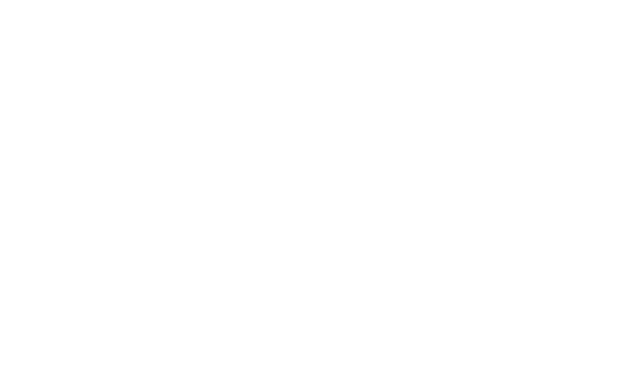

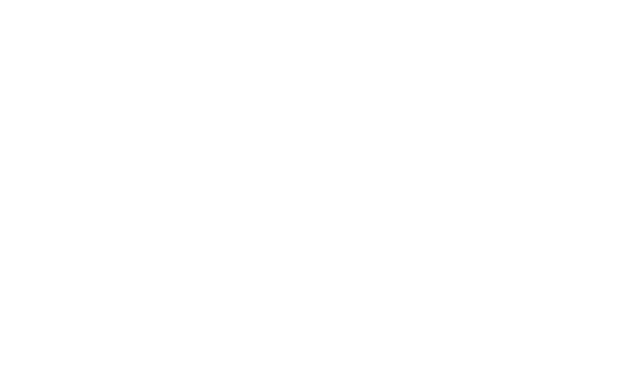

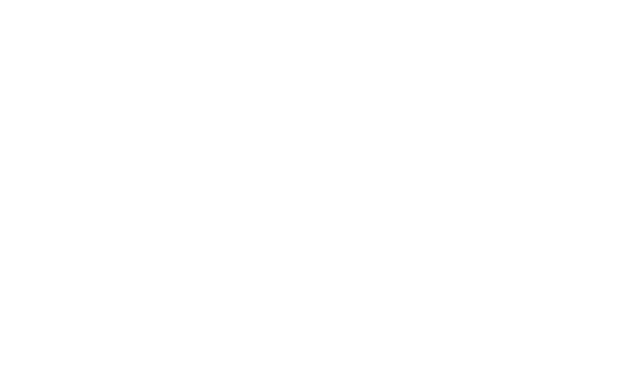

In [4]:
plots,titles = get_plot(gdf, "classe", "white") # The second parameter, "type" is changed depending on the Unique class's name we are extracting

### Define Limits

In [5]:
xmin, xmax, ymin, ymax = (coords["limits"]["xmin"]), (coords["limits"]["xmax"]), (coords["limits"]["ymin"]), (coords["limits"]["ymax"])

# Matrix Size:
# Limits: [108:472, 95:692]

# y length
ylen = 472-108

# x length
xlen = 692-95

### Process by chunks

In [8]:
split = 5 # This was set to 100 when extracting files on the Virtual Machines. See ../'Sample VM Files'/extract_bdtq_hydro_s_poly.py
cur_plot = 2

final_mat = []

for main_idx in range(len(plots)):

    final_mat_it = sparse.csr_matrix(np.empty((0, xlen*split)))

    for iy in range(split):

        new_row = sparse.csr_matrix(np.empty((ylen, 0)))

        for ix in range(split):
            plots[main_idx][1].axis([
                xmin+(((xmax-xmin)/split)*ix), 
                xmin+(((xmax-xmin)/split)*(ix+1)),
                ymin+(((ymax-ymin)/split)*iy),
                ymin+(((ymax-ymin)/split)*(iy+1)),
            ])


            plots[main_idx][0].canvas.draw()

            X = np.array(plots[main_idx][0].canvas.renderer.buffer_rgba())
            X_final = np.zeros((len(X), len(X[0])))

            # convert matrix to a 0-1 scale to save space
            print(ix, iy)

            for row in range(len(X)):
                for col in range(len(X[row])):
                    X_final[row][col] = (float(X[row][col][3]))/255.0
            X_final = X_final[108:472, 95:692]
            

            # figx, axX = plt.subplots()
            # axX.set_title("x"+str(ix)+"y"+str(iy))
            # axX.matshow(X_final)

            new_row = sparse.hstack((new_row, sparse.csr_matrix(X_final)))
            del X_final
            # plt.close(figx)
        
        # print(new_row)

        final_mat_it = sparse.vstack((new_row, final_mat_it))
        del new_row

    sparse.save_npz("data-sample/"+titles[main_idx]+".npz", final_mat_it) # Save path

    del final_mat_it

    # figx, axX = plt.subplots()
    # axX.set_title(titles[main_idx])
    # axX.matshow(final_mat_it)

    # final_mat.append(final_mat_it)

0 0
1 0
2 0
3 0
4 0
0 1
1 1
2 1
3 1
4 1
0 2
1 2
2 2
3 2
4 2
0 3
1 3
2 3
3 3
4 3
0 4
1 4
2 4
3 4
4 4
0 0
1 0
2 0
3 0
4 0
0 1
1 1
2 1
3 1
4 1
0 2
1 2
2 2
3 2
4 2
0 3
1 3
2 3
3 3
4 3
0 4
1 4
2 4
3 4
4 4
0 0
1 0
2 0
3 0
4 0
0 1
1 1
2 1
3 1
4 1
0 2
1 2
2 2
3 2
4 2
0 3
1 3
2 3
3 3
4 3
0 4
1 4
2 4
3 4
4 4
